## Load and clean data

In [1]:
import pandas as pd

# Load and print data
df = pd.read_json('data.json')
df

,assignmentToken,clientMetadataType,measurementUnit,name,value,measurementDate,measurementId
0,d05f8ccc-c631-4234-811a-fc33dbba7d1d,Kitchen Motion Sensor,,Kitchen motion,1.0,2019-09-30T21:00:01.787Z,bulgrarAlarm
1,47b512cd-0513-42a9-93c5-b0d0986e9994,Livingroom Motion Sensor,,Living room motion,0.0,2019-09-30T21:00:26.617Z,bulgrarAlarm
2,d05f8ccc-c631-4234-811a-fc33dbba7d1d,Kitchen Motion Sensor,,Kitchen motion,0.0,2019-09-30T21:00:32.499Z,bulgrarAlarm
3,d05f8ccc-c631-4234-811a-fc33dbba7d1d,Kitchen Motion Sensor,,Kitchen motion,1.0,2019-09-30T21:00:36.592Z,bulgrarAlarm
4,47b512cd-0513-42a9-93c5-b0d0986e9994,Livingroom Motion Sensor,,Living room motion,1.0,2019-09-30T21:01:37.597Z,bulgrarAlarm
...,...,...,...,...,...,...,...
4352,47b512cd-0513-42a9-93c5-b0d0986e9994,Livingroom Motion Sensor,,Living room motion,1.0,2019-10-11T06:18:12.005Z,bulgrarAlarm
4353,ed318dfb-a625-475c-9e18-243da7ef0173,Bedroom Motion Sensor,,Bedroom motion,0.0,2019-10-11T06:18:18.948Z,bulgrarAlarm
4354,4674e421-bbe0-4a39-b65c-166709f2a494,Bathroom Motion Sensor,,Bathroom motion,0.0,2019-10-11T06:18:20.077Z,bulgrarAlarm
4355,47b512cd-0513-42a9-93c5-b0d0986e9994,Livingroom Motion Sensor,,Living room motion,0.0,2019-10-11T06:19:20.364Z,bulgrarAlarm


In [2]:
# Check if we have null values
print(df.isnull().sum())

assignmentToken       0
clientMetadataType    0
measurementUnit       0
name                  0
value                 0
measurementDate       0
measurementId         0
dtype: int64


In [3]:
# Print unique values
print(' Unique values of assignmentToken:',df['assignmentToken'].unique(), '\n', '\n',
      'Unique values of clientMetadataType:',df['clientMetadataType'].unique(), '\n', '\n',
      'Unique values of measurementUnit:',df['measurementUnit'].unique(), '\n','\n',
     'Unique values of name:',df['name'].unique(), '\n', '\n',
      'Unique values of measurementUnit:',df['measurementId'].unique())

 Unique values of assignmentToken: ['d05f8ccc-c631-4234-811a-fc33dbba7d1d'
 '47b512cd-0513-42a9-93c5-b0d0986e9994'
 '4674e421-bbe0-4a39-b65c-166709f2a494'
 'ed318dfb-a625-475c-9e18-243da7ef0173'
 'f76a234b-2d52-456c-88d6-43de07614236'] 
 
 Unique values of clientMetadataType: ['Kitchen Motion Sensor' 'Livingroom Motion Sensor'
 'Bathroom Motion Sensor' 'Bedroom Motion Sensor' 'Other'] 
 
 Unique values of measurementUnit: ['' 'Β°C'] 
 
 Unique values of name: ['Kitchen motion' 'Living room motion' 'Bathroom motion' 'Bedroom motion'
 'Door sensor'] 
 
 Unique values of measurementUnit: ['bulgrarAlarm' 'temperature' 'doorAlarm']


In [4]:
# Convert measurementDate to datetime format and skip milleseconds
df['measurementDate'] = df['measurementDate'].astype('datetime64[s]')

In [5]:
# Seems like the door's sensor, when is first triggered it has value 0 (not 1 like the other sensors), let's switch it
df.loc[df['name'] == 'Door sensor', 'value'] = df.loc[df['name'] == 'Door sensor', 'value'].replace({1:0, 0:1})

In [6]:
# Convert assignmentToken values to numerical codes
df['assignmentToken'] = df['assignmentToken'].astype('category').cat.codes

### Find all columns that don't provide any kind of information

In [7]:
# measurementUnit
if df[df['measurementId'] == 'temperature'].equals(df[df['measurementUnit'] == 'Β°C']):
    print('Whenever measurementId is temperature, the measurementUnit is Β°C. So the measurementUnit column is unnecessary')
    df = df.drop(['measurementUnit'], axis=1)

Whenever measurementId is temperature, the measurementUnit is Β°C. So the measurementUnit column is unnecessary


In [8]:
# assignmentToken / clientMetadataType / name, seem to be the same thing
import numpy as np

df_test = df.copy()

df_test['clientMetadataType'] = df_test['clientMetadataType'].map({'Other': 4, 'Bedroom Motion Sensor': 3, 
                                                         'Kitchen Motion Sensor': 2, 'Livingroom Motion Sensor': 1, 
                                                         'Bathroom Motion Sensor': 0})

df2 = df_test.loc[np.all(df[['assignmentToken']].values == df_test[['clientMetadataType']].values, axis=1),:]
if len(df2)==len(df):
    df = df.drop(['clientMetadataType'], axis=1)
    
df_test['name'] = df_test['name'].map({'Door sensor': 4, 'Bedroom motion': 3, 'Kitchen motion': 2, 
                             'Living room motion': 1, 'Bathroom motion': 0})

df3 = df_test.loc[np.all(df[['assignmentToken']].values == df_test[['name']].values, axis=1),:]
if len(df2)==len(df):
    df = df.drop(['name'], axis=1)

df

,assignmentToken,value,measurementDate,measurementId
0,2,1.0,2019-09-30 21:00:01,bulgrarAlarm
1,1,0.0,2019-09-30 21:00:26,bulgrarAlarm
2,2,0.0,2019-09-30 21:00:32,bulgrarAlarm
3,2,1.0,2019-09-30 21:00:36,bulgrarAlarm
4,1,1.0,2019-09-30 21:01:37,bulgrarAlarm
...,...,...,...,...
4352,1,1.0,2019-10-11 06:18:12,bulgrarAlarm
4353,3,0.0,2019-10-11 06:18:18,bulgrarAlarm
4354,0,0.0,2019-10-11 06:18:20,bulgrarAlarm
4355,1,0.0,2019-10-11 06:19:20,bulgrarAlarm


## Find KPIs (Key Performance Indicators)

In [9]:
import datetime as dt

temp_datetime = None
previous_sensor= None

# Save time spend in room
total_time_spend = [0]*5
cur_date_time_spend = [0]*5

# Save number of room changes
n_of_room_changes=0

# Try to find when he goes to sleep and when he wakes up
last_lr_motion = None
sleep_time= []
wake_time = []

df = df.loc[(df['value']==1) & (df['measurementId']!='temperature')] # Get only non-temperature rows that have value 1

for date in df['measurementDate'].dt.date.unique(): # Iterate through dates
    for index, values in df[df['measurementDate'].dt.date == date].iterrows(): # Iterate through each day's rows
        current_sensor = values['assignmentToken']
        datetime=values['measurementDate']
        
        # Add time for the previous activity
        if previous_sensor != None:
            cur_date_time_spend[previous_sensor] += pd.Timedelta(datetime-temp_datetime).seconds
        
        # If there was no living room motion detected for 4 hours, user went to sleep (these works on our data correctly)
        if current_sensor==1: #Living Room
            if last_lr_motion!=None and previous_sensor!=1 and pd.Timedelta(datetime-last_lr_motion).seconds>3600*4:
                sleep_time.append(last_lr_motion.strftime('%H:%M:%S'))
                wake_time.append(datetime.strftime('%H:%M:%S'))
            last_lr_motion=datetime
            
        # Change the previous sensor, and add 1 to number of room changes
        temp_datetime=datetime
        if previous_sensor!=current_sensor:
            previous_sensor=current_sensor
            n_of_room_changes+=1           
    
    # Add time till midnight
    midnight = temp_datetime.to_pydatetime().combine(temp_datetime + 
                                                     dt.timedelta(days=1), dt.time(0))

    cur_date_time_spend[previous_sensor] += pd.Timedelta(midnight-temp_datetime).seconds
    
    # Add current date's times to total times           
    for x in range(5):
        total_time_spend[x] += cur_date_time_spend[x]
           
    # We do this, so the next day, we have the difference between the first trigger and midnight
    temp_datetime = midnight 
    
    # Reset current date times
    cur_date_time_spend = [0]*5

### KPI 1: Room's average time

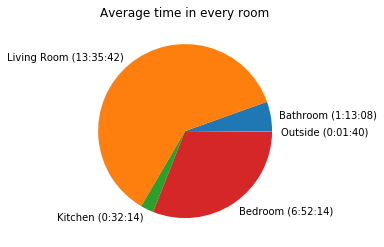

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

n_of_days=len(df['measurementDate'].dt.date.unique())
labels = ['Bathroom', 'Living Room', 'Kitchen', 'Bedroom', 'Outside']

for x in range(5):
    seconds=int(total_time_spend[x]/n_of_days)
    labels[x] += ' (' + str(dt.timedelta(seconds=seconds)) + ')'

plt.title('Average time in every room')
plt.pie(total_time_spend, labels=labels)
plt.show()

### KPI 2: Average room changes

In [11]:
print('There are', int(n_of_room_changes/n_of_days), 'room changes on average per day')

There are 77 room changes on average per day


### KPI 3: Average time he/she goes to sleep/wakes up

In [12]:
# This code is from https://stackoverflow.com/a/52839039/689617
# It calculates the mean between a list of timestamps. (e.g mean of 23:00,00:00,01:00 should be 00:00 and not 08:00)

from cmath import rect, phase
from math import radians, degrees

def meanAngle(deg):
    complexDegree = sum(rect(1, radians(d)) for d in deg) / len(deg)
    argument = phase(complexDegree)
    meanAngle = degrees(argument)
    return meanAngle

def meanTime(times):
    t = (time.split(':') for time in times)
    seconds = ((float(s) + int(m) * 60 + int(h) * 3600) 
               for h, m, s in t)
    day = 24 * 60 * 60
    toAngles = [s * 360. / day for s in seconds]
    meanAsAngle = meanAngle(toAngles)
    meanSeconds = meanAsAngle * day / 360.
    if meanSeconds < 0:
        meanSeconds += day
    h, m = divmod(meanSeconds, 3600)
    m, s = divmod(m, 60)
    return('%02i:%02i:%02i' % (h, m, s))

In [13]:
print('Average time he/she goes to sleep:', meanTime(sleep_time))
print('Average time he/she wakes up:', meanTime(wake_time))

Average time he/she goes to sleep: 22:59:43
Average time he/she wakes up: 06:33:16
